In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

# very imp for default colored grid
sns.set()

In [2]:
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [3]:
os.listdir('data/')

['zillow_data_dictionary.xlsx',
 'sample_submission.csv',
 'properties_2016.csv',
 'train_2016_v2.csv']

In [4]:
properties_2016.csv
sample_submission.csv
train_2016.csv
zillow_data_dictionary.xlsx

NameError: name 'properties_2016' is not defined

In [5]:
# from subprocess import check_output
# print(check_output(["ls","../data"]).decode("utf8"))

In [6]:
train_df = pd.read_csv("data/train_2016_v2.csv", parse_dates=["transactiondate"])

In [7]:
train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [8]:
train_df.shape

(90275, 3)

In [9]:
sns.set()

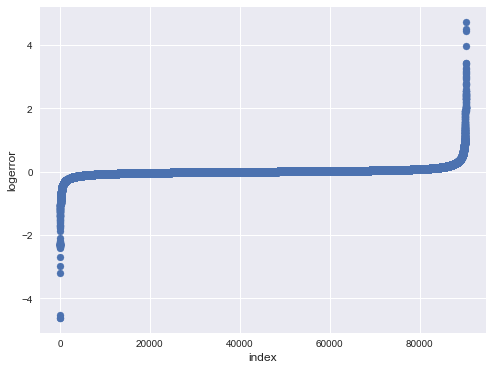

In [10]:
# target is log_error

plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

In [11]:
batch = train_df[:10]

In [12]:
batch

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02
5,11509835,-0.2705,2016-01-02
6,12286022,0.0440,2016-01-02
7,17177301,0.1638,2016-01-02
8,14739064,-0.0030,2016-01-02
9,14677559,0.0843,2016-01-03


In [13]:
u = np.percentile(train_df.logerror.values, 99)
l = np.percentile(train_df.logerror.values, 1)

In [14]:
u,l

(0.4638819999999963, -0.3425)

In [15]:
batch['logerror'].iloc[3] = 10

In [16]:
batch['logerror'] > u

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8    False
9    False
Name: logerror, dtype: bool

In [17]:
batch['logerror'].ix[batch['logerror'] > u]

/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


3    10.0
Name: logerror, dtype: float64

In [18]:
batch['logerror'].loc[batch['logerror'] > u]

3    10.0
Name: logerror, dtype: float64

In [19]:
batch['logerror'].loc[batch['logerror'] > u] = u

/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


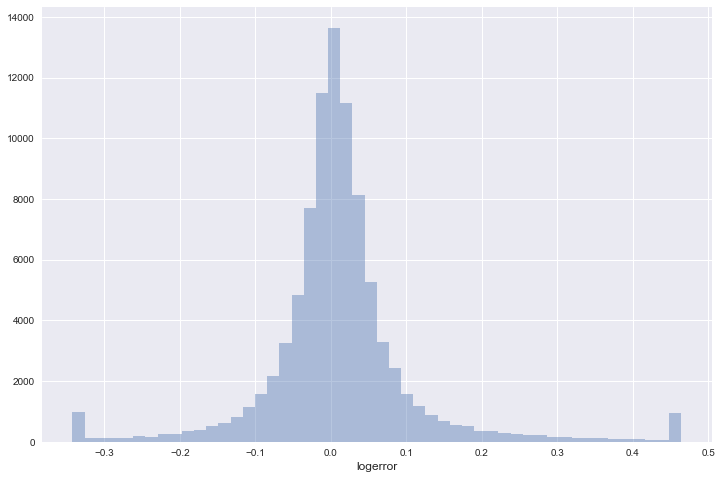

In [20]:
#  remove the outliers and then do a histogram plot on the same.

ulimit = np.percentile(train_df.logerror.values, 99)
llimit = np.percentile(train_df.logerror.values, 1)
train_df['logerror'].loc[train_df['logerror']>ulimit] = ulimit
train_df['logerror'].loc[train_df['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

In [21]:
train_df['transactiondate'].head()

0   2016-01-01
1   2016-01-01
2   2016-01-01
3   2016-01-02
4   2016-01-02
Name: transactiondate, dtype: datetime64[ns]

In [22]:
train_df['transactiondate'].dt

In [23]:
train_df['transactiondate'].dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: transactiondate, dtype: int64

In [24]:
# transaction date

train_df['transaction_month'] = train_df['transactiondate'].dt.month
cnt_srs = train_df['transaction_month'].value_counts()
cnt_srs

6     10922
8     10476
5      9961
7      9947
9      9575
4      9311
3      8652
1      6556
2      6333
10     4977
11     1826
12     1739
Name: transaction_month, dtype: int64

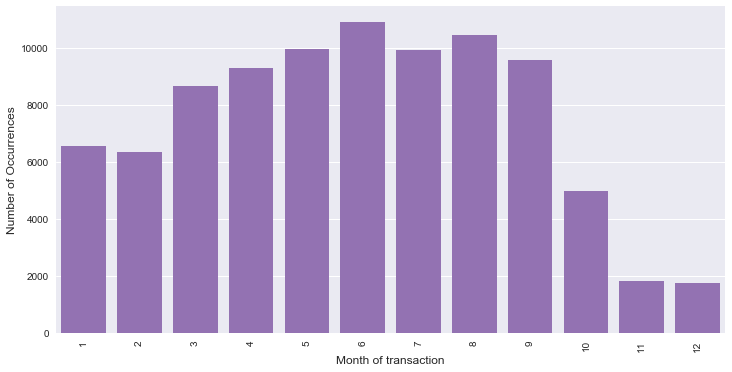

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, color=color[4])
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

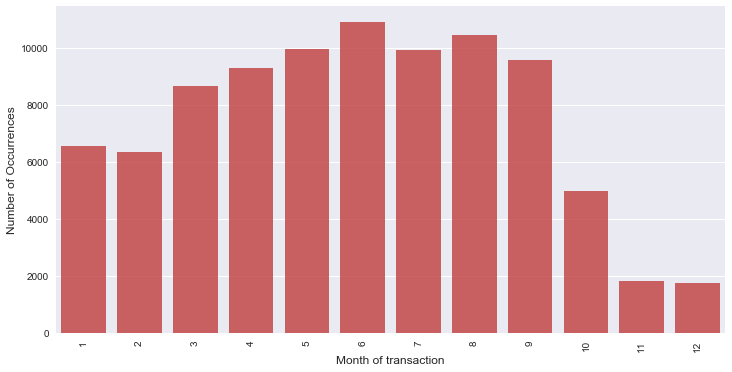

In [26]:
# alpha may be opacity

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha = 0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [27]:
cnt_srs.index

Int64Index([6, 8, 5, 7, 9, 4, 3, 1, 2, 10, 11, 12], dtype='int64')

In [28]:
cnt_srs.values


array([10922, 10476,  9961,  9947,  9575,  9311,  8652,  6556,  6333,
        4977,  1826,  1739])

In [29]:
color

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

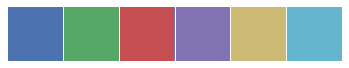

In [30]:
sns.palplot(sns.color_palette())

In [31]:
# parcel id
(train_df['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

In [32]:
(batch['parcelid'].value_counts())

17177301    1
12098116    1
11509835    1
14432541    1
14739064    1
12286022    1
12643413    1
14366692    1
14677559    1
11016594    1
Name: parcelid, dtype: int64

In [33]:
(batch['parcelid'].value_counts().reset_index())

,index,parcelid
0,17177301,1
1,12098116,1
2,11509835,1
3,14432541,1
4,14739064,1
5,12286022,1
6,12643413,1
7,14366692,1
8,14677559,1
9,11016594,1


In [34]:
(batch['parcelid'].value_counts().reset_index())['parcelid']

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: parcelid, dtype: int64

In [35]:
(batch['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    10
Name: parcelid, dtype: int64

In [36]:
# properties

prop_df = pd.read_csv("data/properties_2016.csv")
prop_df.shape

/home/ankish/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [37]:
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [38]:
missing_count = prop_df.isnull().sum(axis=0)

In [39]:
missing_count.values

array([      0, 2173698, 2979156, 2983589,   11462,   11450, 2972588,
       1046729,  128912, 2968121, 2782500,   55565,  276033, 2977545,
       2794419, 2782500, 2963216,   11437, 2672580,  128912, 2101950,
       2101950, 2916203, 1178816,   11437,   11437,  276099, 2467683,
       2957257, 2948278, 2953142, 2499758,   12277,   11437, 1006588,
         11437,   62845,   11437, 1828815,   13980,   11475, 2983593,
       2673586, 2978470, 1007727, 2904862, 2982570,   59928, 2303148,
       2980054,   54982,   42550,   11439,   67733,   31250, 2928755,
       2928753,   75126])

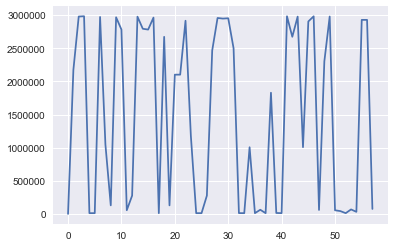

In [40]:
plt.plot(missing_count.values)

<BarContainer object of 58 artists>

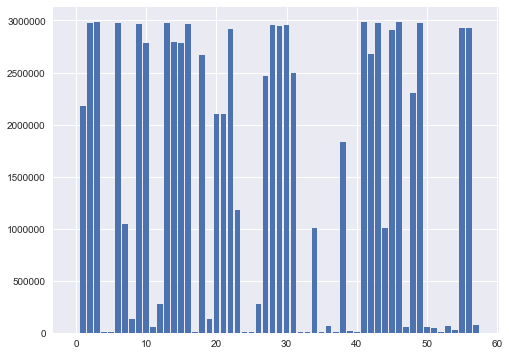

In [41]:
plt.figure(figsize=(8,6))
plt.bar(np.arange(missing_count.shape[0]), height=missing_count.values)

In [42]:
missing_count.shape

(58,)

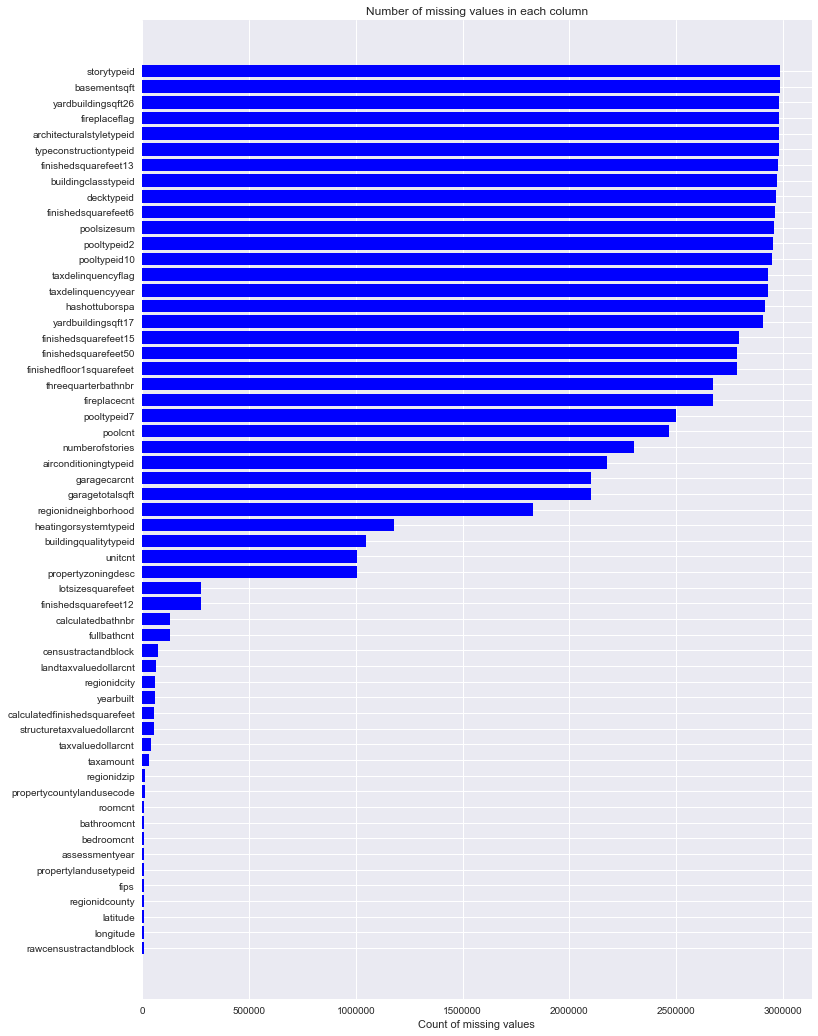

In [43]:
missing_df = prop_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 864x864 with 0 Axes>

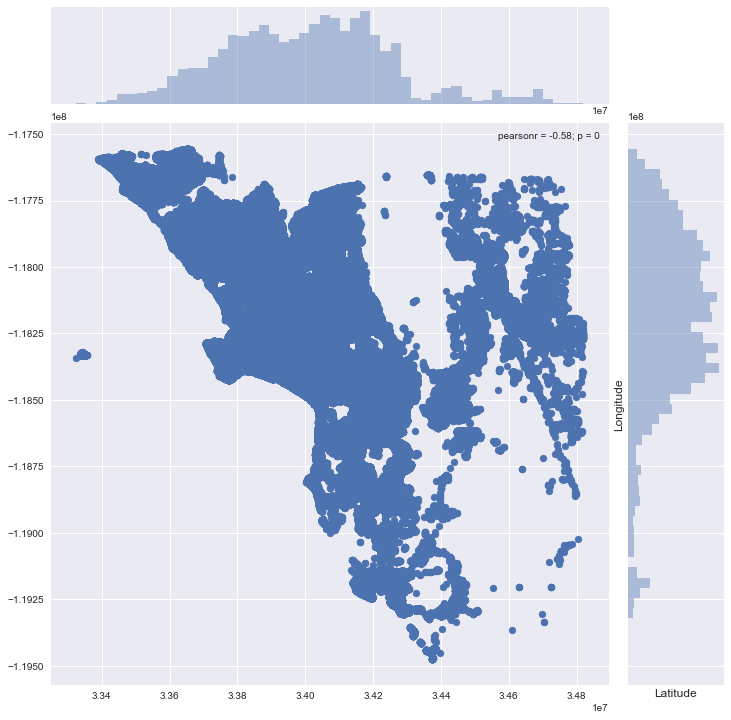

In [44]:
plt.figure(figsize=(12,12))
sns.jointplot(x=prop_df.latitude.values, y=prop_df.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()


In [45]:
prop_df.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

In [46]:
# merging
train_df.shape, prop_df.shape

((90275, 4), (2985217, 58))

In [47]:
train_df = pd.merge(train_df, prop_df, on='parcelid',how='left')
train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.027600,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.168400,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.004000,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.463882,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.005000,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [48]:
train_df.shape

(90275, 61)

In [165]:
# train_df.loc[train_df.isnull().sum(axis=0)>0]

In [50]:
train_df.isnull().sum(axis=0)

parcelid                            0
logerror                            0
transactiondate                     0
transaction_month                   0
airconditioningtypeid           61494
architecturalstyletypeid        90014
basementsqft                    90232
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             90259
buildingqualitytypeid           32911
calculatedbathnbr                1182
decktypeid                      89617
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fips                                0
fireplacecnt                    80668
fullbathcnt                      1182
garagecarcnt                    60338
garagetotalsqft                 60338
hashottuborspa                  87910
heatingorsys

In [51]:
pd.options.display.max_rows = 65

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["count", "column type"]
dtype_df

,count,column type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64
8,bedroomcnt,float64
9,buildingclasstypeid,float64


In [52]:
# >>> df
#    A  B         C
# 0  1  1  0.362838
# 1  1  2  0.227877
# 2  2  3  1.267767
# 3  2  4 -0.562860


# >>> df.groupby('A').agg(['min', 'max'])
#     B             C
#   min max       min       max
# A
# 1   1   2  0.227877  0.362838
# 2   3   4 -0.562860  1.267767



dtype_df.groupby("column type").aggregate('count').reset_index()

,column type,count
0,int64,2
1,float64,53
2,datetime64[ns],1
3,object,5


In [53]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df['missing_ratio'] = missing_df['missing_count']/train_df.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.999]

,column_name,missing_count,missing_ratio
6,basementsqft,90232,0.999524
9,buildingclasstypeid,90259,0.999823
16,finishedsquarefeet13,90242,0.999634
44,storytypeid,90232,0.999524


In [54]:
# coorelation between variable and target

# Let us just impute the missing values with mean values to compute correlation coefficients #
mean_values = train_df.mean(axis=0)
train_df_new = train_df.fillna(mean_values, inplace=True)


In [55]:
train_df.mean(axis=0)

parcelid                        1.298466e+07
logerror                        1.041026e-02
transaction_month               5.849848e+00
airconditioningtypeid           1.816372e+00
architecturalstyletypeid        7.229885e+00
basementsqft                    7.135814e+02
bathroomcnt                     2.279474e+00
bedroomcnt                      3.031869e+00
buildingclasstypeid             4.000000e+00
buildingqualitytypeid           5.565407e+00
calculatedbathnbr               2.309216e+00
decktypeid                      6.600000e+01
finishedfloor1squarefeet        1.347974e+03
calculatedfinishedsquarefeet    1.773186e+03
finishedsquarefeet12            1.745455e+03
finishedsquarefeet13            1.404545e+03
finishedsquarefeet15            2.380090e+03
finishedsquarefeet50            1.355547e+03
finishedsquarefeet6             2.302546e+03
fips                            6.048871e+03
fireplacecnt                    1.187884e+00
fullbathcnt                     2.241231e+00
garagecarc

In [56]:
train_df.isnull().sum(axis=0)

parcelid                            0
logerror                            0
transactiondate                     0
transaction_month                   0
airconditioningtypeid               0
architecturalstyletypeid            0
basementsqft                        0
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid                 0
buildingqualitytypeid               0
calculatedbathnbr                   0
decktypeid                          0
finishedfloor1squarefeet            0
calculatedfinishedsquarefeet        0
finishedsquarefeet12                0
finishedsquarefeet13                0
finishedsquarefeet15                0
finishedsquarefeet50                0
finishedsquarefeet6                 0
fips                                0
fireplacecnt                        0
fullbathcnt                         0
garagecarcnt                        0
garagetotalsqft                     0
hashottuborspa                      0
heatingorsys

In [57]:
a = train_df.fillna(mean_values, inplace=True)

In [58]:
train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.027600,2016-01-01,1,1.000000,7.229885,713.581395,2.0,3.0,4.0,4.000000,2.0,66.0,1347.974037,1684.0,1684.0,1404.545455,2380.090067,1355.546674,2302.546318,6037.0,1.187884,2.0,1.812005,345.521228,1,2.000000,34280990.0,-118488536.0,7528.0,1.0,519.827657,1.0,1.0,1.0,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.000000,96370.0,0.0,7.0,1.008743,6.010033,1.000000,310.142101,311.694737,1959.0,1.440739,1,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,13.402692,6.037107e+13
1,14366692,-0.168400,2016-01-01,1,1.816372,7.229885,713.581395,3.5,4.0,4.0,5.565407,3.5,66.0,1347.974037,2263.0,2263.0,1404.545455,2380.090067,1355.546674,2302.546318,6059.0,1.187884,3.0,2.000000,468.000000,1,3.926979,33668120.0,-117677556.0,3643.0,1.0,519.827657,1.0,1.0,1.0,1,261.0,NaN,6.059052e+07,32380.0,1286.0,190646.540237,96962.0,0.0,7.0,1.000000,6.010033,1.110414,310.142101,311.694737,2014.0,1.440739,1,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,13.402692,6.049151e+13
2,12098116,-0.004000,2016-01-01,1,1.000000,7.229885,713.581395,3.0,2.0,4.0,4.000000,3.0,66.0,1347.974037,2217.0,2217.0,1404.545455,2380.090067,1355.546674,2302.546318,6037.0,1.187884,3.0,1.812005,345.521228,1,2.000000,34136312.0,-118175032.0,11423.0,1.0,519.827657,1.0,1.0,1.0,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.000000,96293.0,0.0,7.0,1.008743,6.010033,1.000000,310.142101,311.694737,1940.0,1.440739,1,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,13.402692,6.037464e+13
3,12643413,0.463882,2016-01-02,1,1.000000,7.229885,713.581395,2.0,2.0,4.0,4.000000,2.0,66.0,1347.974037,839.0,839.0,1404.545455,2380.090067,1355.546674,2302.546318,6037.0,1.187884,2.0,1.812005,345.521228,1,2.000000,33755800.0,-118309000.0,70859.0,1.0,519.827657,1.0,1.0,1.0,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.000000,96222.0,0.0,7.0,1.008743,6.010033,1.000000,310.142101,311.694737,1987.0,1.440739,1,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,13.402692,6.037296e+13
4,14432541,-0.005000,2016-01-02,1,1.816372,7.229885,713.581395,2.5,4.0,4.0,5.565407,2.5,66.0,1347.974037,2283.0,2283.0,1404.545455,2380.090067,1355.546674,2302.546318,6059.0,1.187884,2.0,2.000000,598.000000,1,3.926979,33485643.0,-117700234.0,6000.0,1.0,519.827657,1.0,1.0,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,190646.540237,96961.0,8.0,7.0,1.000000,6.010033,1.110414,310.142101,311.694737,1981.0,2.000000,1,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,13.402692,6.059042e+13


In [59]:
train_df.isnull().any()

parcelid                        False
logerror                        False
transactiondate                 False
transaction_month               False
airconditioningtypeid           False
architecturalstyletypeid        False
basementsqft                    False
bathroomcnt                     False
bedroomcnt                      False
buildingclasstypeid             False
buildingqualitytypeid           False
calculatedbathnbr               False
decktypeid                      False
finishedfloor1squarefeet        False
calculatedfinishedsquarefeet    False
finishedsquarefeet12            False
finishedsquarefeet13            False
finishedsquarefeet15            False
finishedsquarefeet50            False
finishedsquarefeet6             False
fips                            False
fireplacecnt                    False
fullbathcnt                     False
garagecarcnt                    False
garagetotalsqft                 False
hashottuborspa                  False
heatingorsys

In [60]:
train_df[train_df['propertycountylandusecode'].isnull() == True]

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
68412,12719173,-0.005,2016-08-22,8,1.816372,7.229885,713.581395,0.0,0.0,4.0,4.0,2.309216,66.0,1347.974037,1924.0,1745.454531,1404.545455,1924.0,1355.546674,2302.546318,6037.0,1.187884,2.241231,1.812005,345.521228,1,3.926979,33939933.0,-118068371.0,29110.164177,1.0,519.827657,1.0,1.0,1.0,NaN,266.0,NaN,6.037503e+07,13716.0,3101.0,190646.540237,96201.0,0.0,7.0,1.008743,6.010033,1.0,310.142101,311.694737,2014.0,1.440739,1,372356.0,474354.0,2015.0,101998.0,6027.2,NaN,13.402692,6.037503e+13


In [61]:
train_df.iloc[68412].propertycountylandusecode = train_df.iloc[68410].propertycountylandusecode

In [62]:
train_df.iloc[68412].propertycountylandusecode = '0100'

In [63]:
train_df.iloc[68412].propertycountylandusecode

nan

In [64]:
train_df.iloc[68412].propertycountylandusecode = 100

In [65]:
train_df.iloc[68412].propertycountylandusecode

nan

In [66]:
train_df.shape

(90275, 61)

In [67]:
train_df.drop(train_df.index[68412], inplace=True)
train_df.shape

(90274, 61)

In [68]:
train_df.iloc[68412].propertycountylandusecode

'010C'

In [69]:
# taxdelinquencyflag 
# propertyzoningdesc

In [70]:
train_df.propertyzoningdesc.isnull().sum(),train_df.taxdelinquencyflag.isnull().sum()

(31961, 88491)

In [71]:
train_df['propertyzoningdesc'].fillna(2.618322e+02, inplace=True)
train_df.propertyzoningdesc.isnull().sum()

0

In [72]:
train_df.taxdelinquencyflag.isnull().sum()

88491

In [73]:
train_df['taxdelinquencyflag'].fillna(1.340269e+01, inplace=True)
train_df.propertyzoningdesc.isnull().sum()

0

In [74]:
train_df.columns[train_df.isna().any()].tolist()

[]

In [75]:
mean_values

parcelid                        1.298466e+07
logerror                        1.041026e-02
transaction_month               5.849848e+00
airconditioningtypeid           1.816372e+00
architecturalstyletypeid        7.229885e+00
basementsqft                    7.135814e+02
bathroomcnt                     2.279474e+00
bedroomcnt                      3.031869e+00
buildingclasstypeid             4.000000e+00
buildingqualitytypeid           5.565407e+00
calculatedbathnbr               2.309216e+00
decktypeid                      6.600000e+01
finishedfloor1squarefeet        1.347974e+03
calculatedfinishedsquarefeet    1.773186e+03
finishedsquarefeet12            1.745455e+03
finishedsquarefeet13            1.404545e+03
finishedsquarefeet15            2.380090e+03
finishedsquarefeet50            1.355547e+03
finishedsquarefeet6             2.302546e+03
fips                            6.048871e+03
fireplacecnt                    1.187884e+00
fullbathcnt                     2.241231e+00
garagecarc

In [76]:
# train_df[train_df['propertyzoningdesc'].isnull() == True]

In [77]:
# train_df.iloc[train_df['propertycountylandusecode'].isnull() == 'True']

In [78]:
train_df.columns[train_df.isna().any()].tolist()

[]

In [79]:
# df.columns[df.isna().any()].tolist()

In [80]:
train_df_new = train_df.copy()


In [81]:
train_df_new.columns.shape

(61,)

In [82]:
col_length = train_df_new.shape[1]
col_list = []
for col in train_df_new.columns:
    if train_df_new[col].dtype == 'float64':
        if col not in 'logerror':
            col_list.append(col)
#      if col not in 'logerror' if train_df_new[col].dtype=='float64']

print('total columns:',col_length)
print('columns having dtype == float (except logerror): ', len(col_list))

total columns: 61
columns having dtype == float (except logerror):  52


In [83]:
col_list

['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollar

In [84]:
np.corrcoef(train_df_new['censustractandblock'].values, train_df_new.logerror.values)

array([[1.        , 0.01384161],
       [0.01384161, 1.        ]])

In [85]:
# Now let us look at the correlation coefficient of each of these variables #


x_cols = [col for col in train_df_new.columns if col not in 'logerror' if train_df_new[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    


/home/ankish/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ankish/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [166]:
import warnings
warnings.filterwarnings("ignore")


x_cols = [col for col in train_df_new.columns if col not in 'logerror' if train_df_new[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    


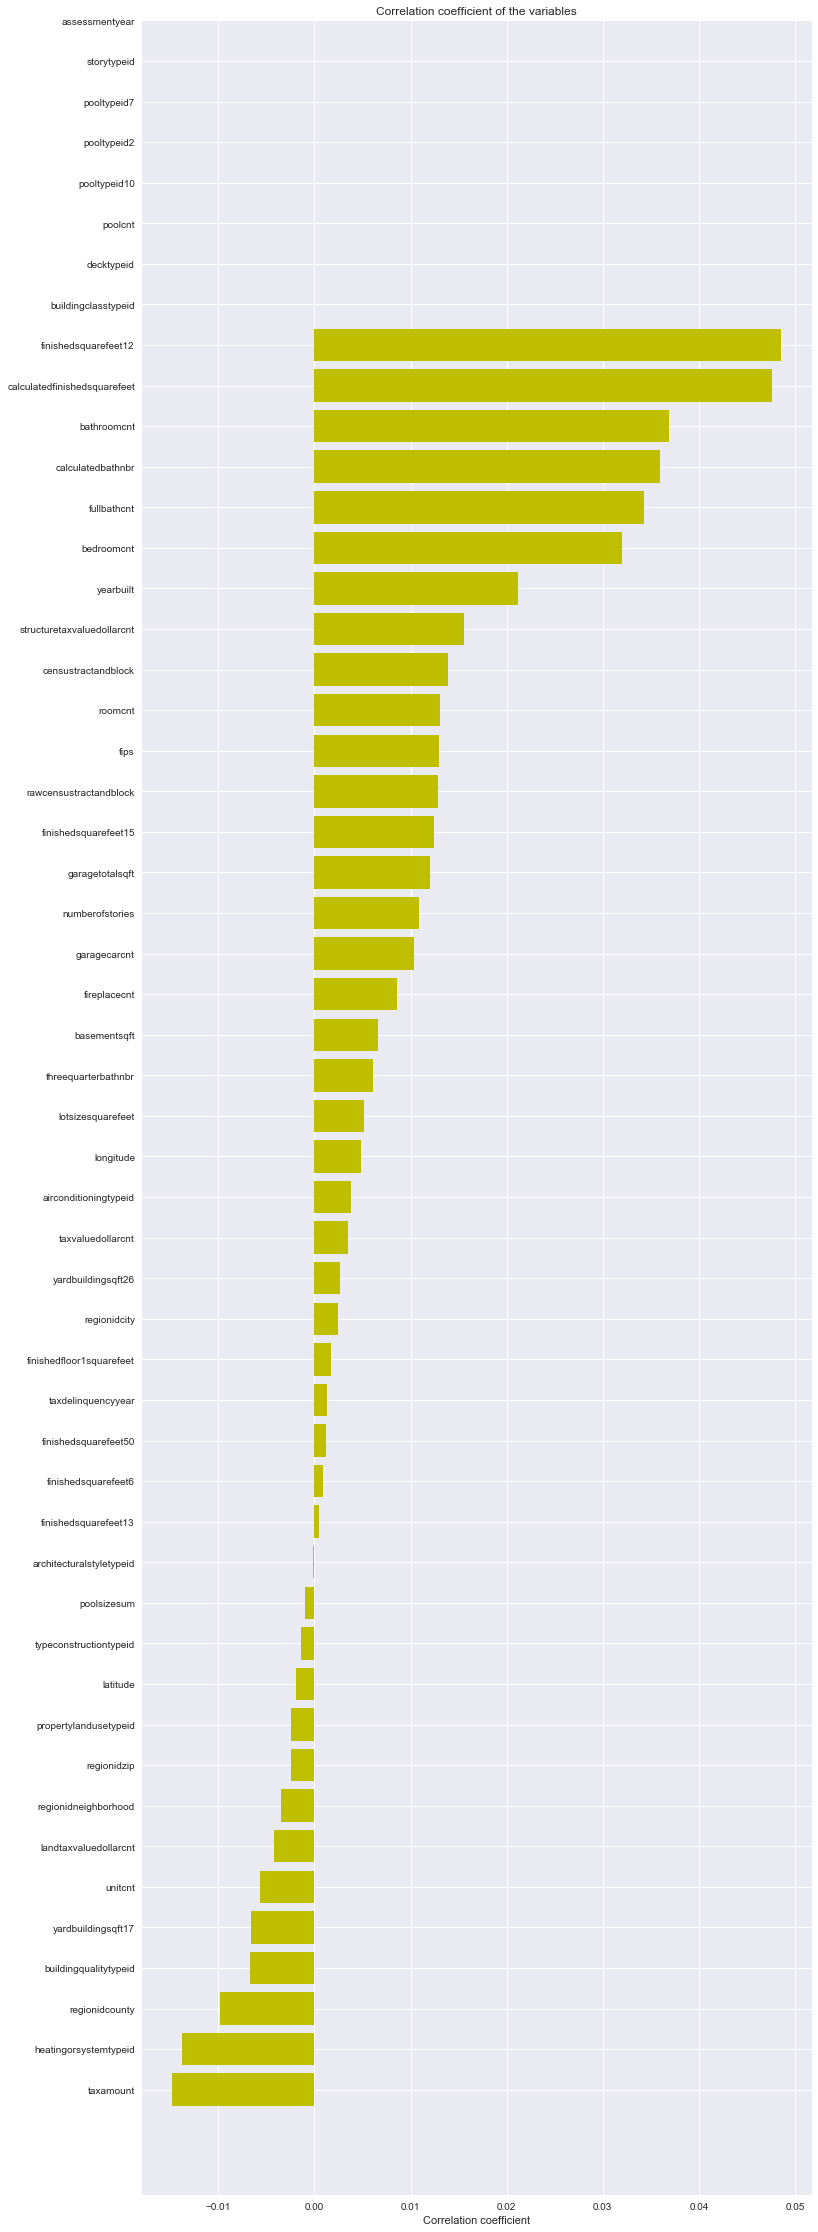

In [86]:
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

In [87]:
train_df_new['storytypeid'].unique()

array([7.])

In [88]:
corr_zero_cols = ['assessmentyear', 'storytypeid', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'poolcnt', 'decktypeid', 'buildingclasstypeid']
for col in corr_zero_cols:
    print(col, len(train_df_new[col].unique()))


assessmentyear 1
storytypeid 1
pooltypeid2 1
pooltypeid7 1
pooltypeid10 1
poolcnt 1
decktypeid 1
buildingclasstypeid 1


In [89]:
# high correlation

corr_df_sel = corr_df.loc[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

,col_labels,corr_values
49,taxamount,-0.014786
21,heatingorsystemtypeid,-0.013761
43,yearbuilt,0.021204
4,bedroomcnt,0.031983
18,fullbathcnt,0.034249
7,calculatedbathnbr,0.035997
3,bathroomcnt,0.036838
10,calculatedfinishedsquarefeet,0.047604
11,finishedsquarefeet12,0.048554


In [90]:
corr_df

,col_labels,corr_values
49,taxamount,-0.014786
21,heatingorsystemtypeid,-0.013761
33,regionidcounty,-0.009803
6,buildingqualitytypeid,-0.006696
41,yardbuildingsqft17,-0.006642
40,unitcnt,-0.005691
48,landtaxvaluedollarcnt,-0.004178
34,regionidneighborhood,-0.003442
35,regionidzip,-0.002494
30,propertylandusetypeid,-0.002484


In [91]:
# Cov(X,Y) = sum_ ((X-mu_x) * (Y - mu_y))
# Corr(X,Y) = Cov / sqrt(sum_ (X-mu_x)^2 * sum_ (Y - mu_y))


# A monotonic function is a function which is either entirely nonincreasing 
# or nondecreasing. A function is monotonic if its first derivative 
# (which need not be continuous) does not change sign.

# Must remember tip: 
#     Correlation quantifies the linear dependence of two variables. 
#     It cannot capture non-linear relationship between two variables.

# Correlation vs. co-variance
#     Correlation is simply the normalized co-variance with the standard 
#     deviation of both the factors. This is done to ensure we get a number 
#     between +1 and -1. Co-variance is very difficult to compare as it 
#     depends on the units of the two variable.

# Pearson vs. Spearman    
#     Pearson captures how linearly dependent are the two variables whereas 
#     Spearman captures the monotonic behavior of the relation between the 
#     variables.
    
#     EXP:      y = exp ( x )

#     Here you will find Pearson coefficient to be 0.25 
#     but the Spearman coefficient to be 1
    
# Is Pearson coefficient sensitive to outliers?
#     The answer is Yes
    
# Is Correlation Transitive?

#     Suppose that X, Y, and Z are random variables. X and Y are positively 
#     correlated and Y and Z are likewise positively correlated. Does it follow 
#     that X and Z must be positively correlated?

#     As we shall see by example, the answer is (perhaps surprisingly) “No.”

In [92]:
corr_df_sel

,col_labels,corr_values
49,taxamount,-0.014786
21,heatingorsystemtypeid,-0.013761
43,yearbuilt,0.021204
4,bedroomcnt,0.031983
18,fullbathcnt,0.034249
7,calculatedbathnbr,0.035997
3,bathroomcnt,0.036838
10,calculatedfinishedsquarefeet,0.047604
11,finishedsquarefeet12,0.048554


In [93]:
cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = train_df[cols_to_use]
corrmat = temp_df.corr(method='spearman')

corrmat

,taxamount,heatingorsystemtypeid,yearbuilt,bedroomcnt,fullbathcnt,calculatedbathnbr,bathroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12
taxamount,1.000000,-0.146228,0.201852,0.285610,0.427377,0.451626,0.443513,0.512635,0.509937
heatingorsystemtypeid,-0.146228,1.000000,-0.330765,-0.116406,-0.402110,-0.347308,-0.354259,-0.245567,-0.256562
yearbuilt,0.201852,-0.330765,1.000000,0.055129,0.376459,0.442687,0.438237,0.225054,0.236195
bedroomcnt,0.285610,-0.116406,0.055129,1.000000,0.533074,0.543567,0.582337,0.688140,0.672224
fullbathcnt,0.427377,-0.402110,0.376459,0.533074,1.000000,0.964031,0.926983,0.735105,0.715419
calculatedbathnbr,0.451626,-0.347308,0.442687,0.543567,0.964031,1.000000,0.969952,0.758943,0.741720
bathroomcnt,0.443513,-0.354259,0.438237,0.582337,0.926983,0.969952,1.000000,0.729042,0.715940
calculatedfinishedsquarefeet,0.512635,-0.245567,0.225054,0.688140,0.735105,0.758943,0.729042,1.000000,0.981639
finishedsquarefeet12,0.509937,-0.256562,0.236195,0.672224,0.715419,0.741720,0.715940,0.981639,1.000000


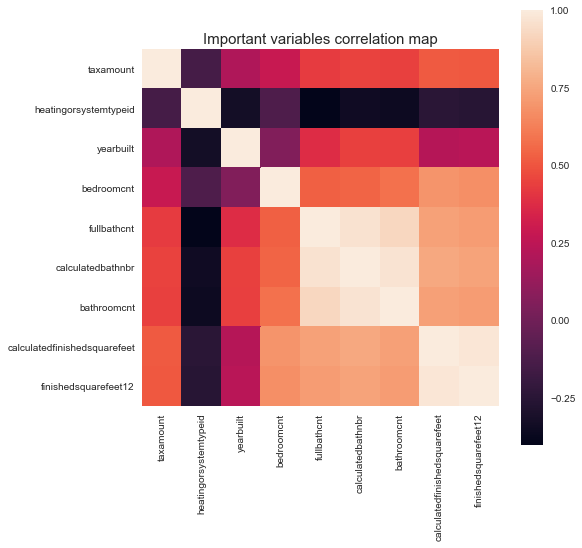

In [94]:
f, ax = plt.subplots(figsize=(8, 8))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [95]:
col = "finishedsquarefeet12"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col]>ulimit] = ulimit
train_df[col].loc[train_df[col]<llimit] = llimit

/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 864x864 with 0 Axes>

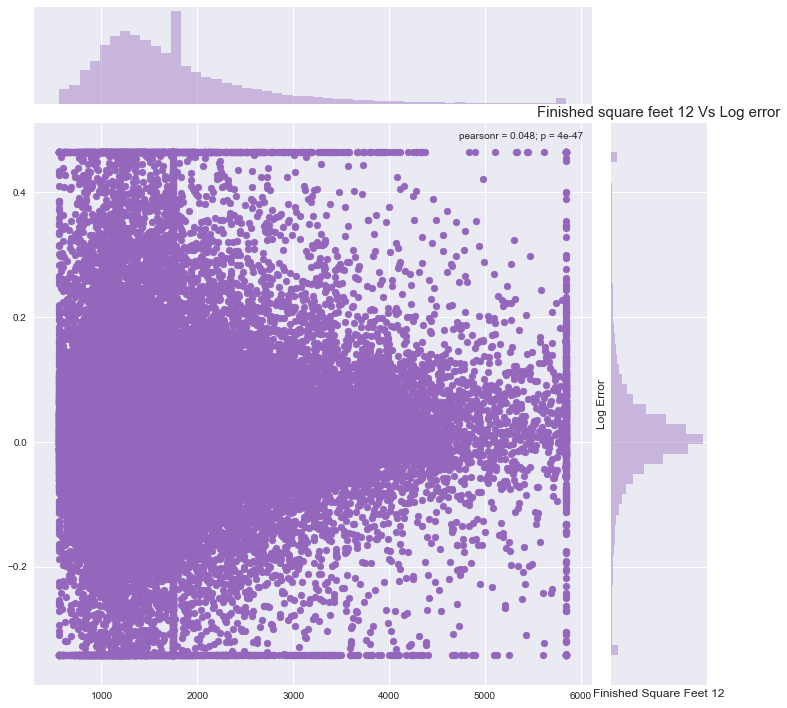

In [96]:
plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.finishedsquarefeet12.values, y=train_df.logerror.values, size=10, color=color[4])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Finished Square Feet 12', fontsize=12)
plt.title("Finished square feet 12 Vs Log error", fontsize=15)
plt.show()

In [97]:

# Seems the range of logerror narrows down with increase in finished square 
# feet 12 variable. Probably larger houses are easy to predict?

In [98]:
corr_df_sel.col_labels

49                       taxamount
21           heatingorsystemtypeid
43                       yearbuilt
4                       bedroomcnt
18                     fullbathcnt
7                calculatedbathnbr
3                      bathroomcnt
10    calculatedfinishedsquarefeet
11            finishedsquarefeet12
Name: col_labels, dtype: object

/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 864x864 with 0 Axes>

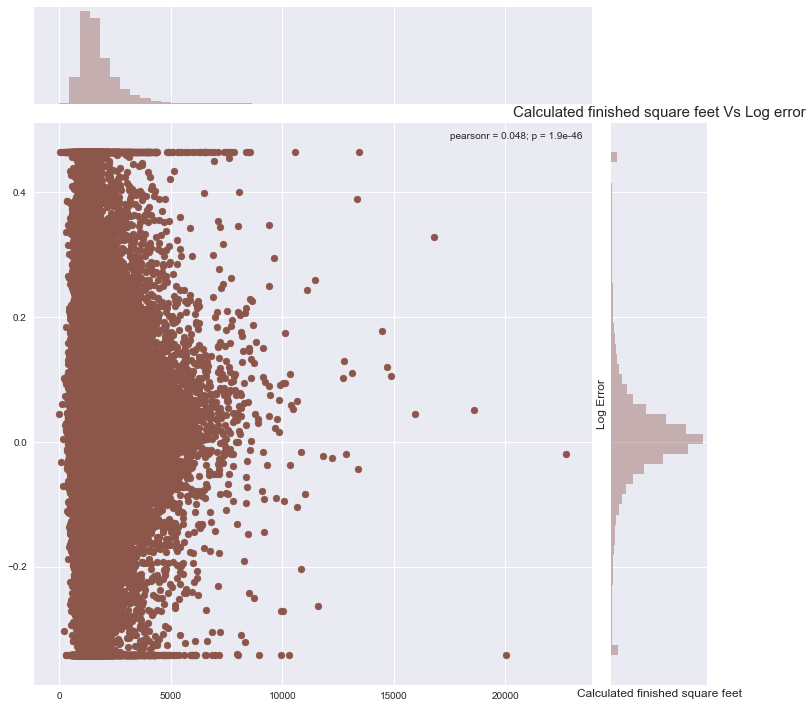

In [99]:
col = "taxamount"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col]>ulimit] = ulimit
train_df[col].loc[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.calculatedfinishedsquarefeet.values, y=train_df.logerror.values, size=10, color=color[5])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated finished square feet', fontsize=12)
plt.title("Calculated finished square feet Vs Log error", fontsize=15)
plt.show()

/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 864x864 with 0 Axes>

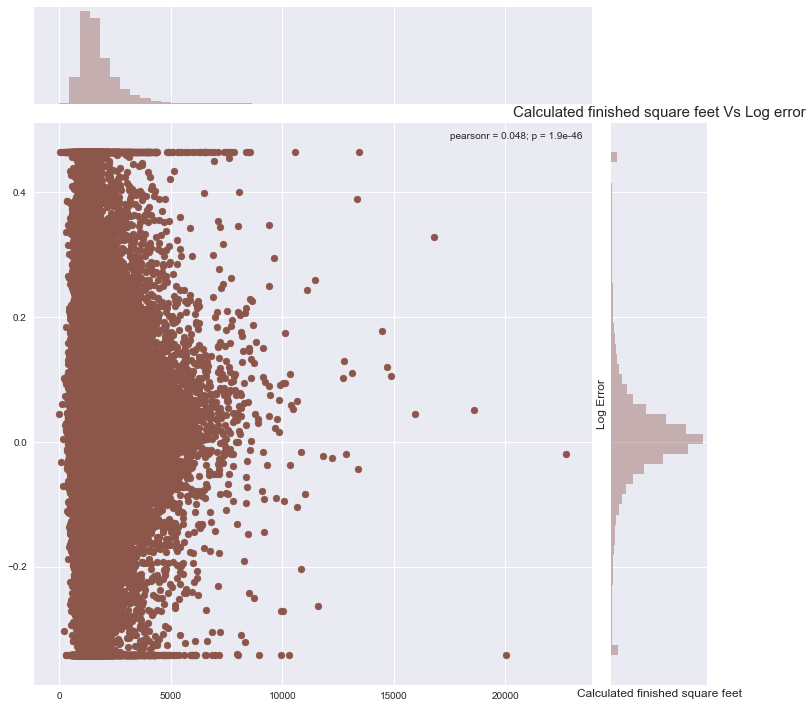

In [100]:
col = "heatingorsystemtypeid"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col]>ulimit] = ulimit
train_df[col].loc[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.calculatedfinishedsquarefeet.values, y=train_df.logerror.values, size=10, color=color[5])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated finished square feet', fontsize=12)
plt.title("Calculated finished square feet Vs Log error", fontsize=15)
plt.show()

/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 864x864 with 0 Axes>

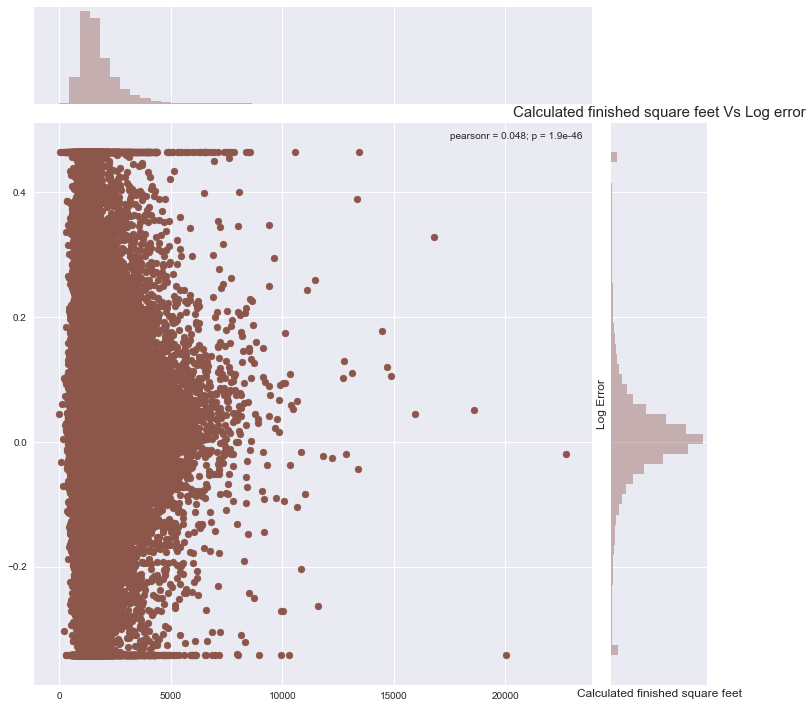

In [101]:
col = "yearbuilt"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col]>ulimit] = ulimit
train_df[col].loc[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.calculatedfinishedsquarefeet.values, y=train_df.logerror.values, size=10, color=color[5])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated finished square feet', fontsize=12)
plt.title("Calculated finished square feet Vs Log error", fontsize=15)
plt.show()

/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 864x864 with 0 Axes>

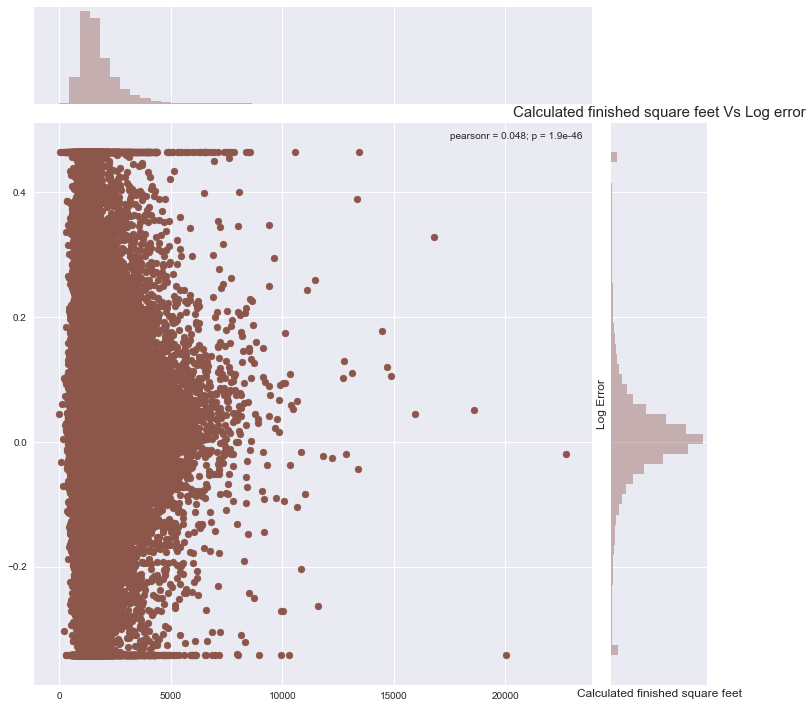

In [102]:
col = "bedroomcnt"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col]>ulimit] = ulimit
train_df[col].loc[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.calculatedfinishedsquarefeet.values, y=train_df.logerror.values, size=10, color=color[5])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated finished square feet', fontsize=12)
plt.title("Calculated finished square feet Vs Log error", fontsize=15)
plt.show()

/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 864x864 with 0 Axes>

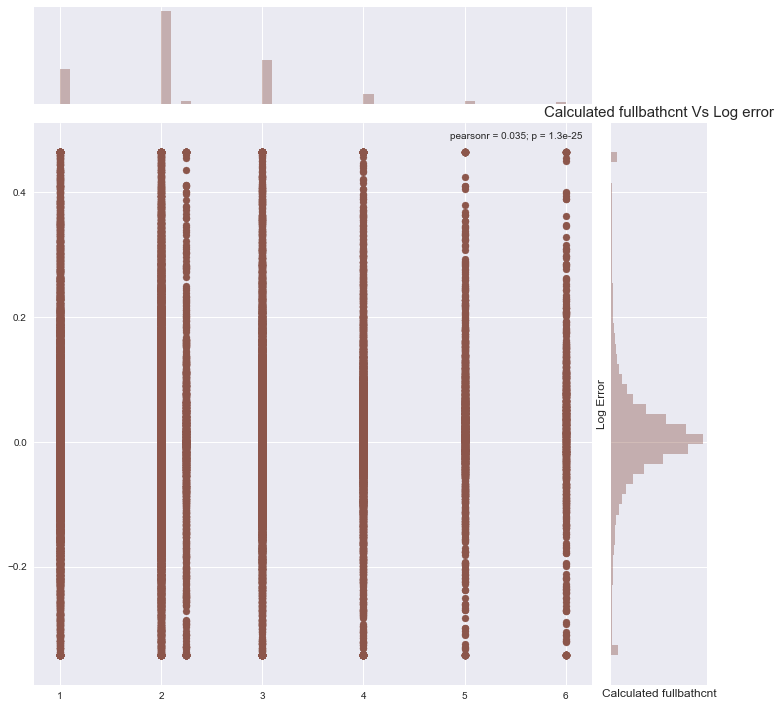

In [103]:
col = "fullbathcnt"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col]>ulimit] = ulimit
train_df[col].loc[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.fullbathcnt.values, y=train_df.logerror.values, size=10, color=color[5])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated fullbathcnt', fontsize=12)
plt.title("Calculated fullbathcnt Vs Log error", fontsize=15)
plt.show()

/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 864x864 with 0 Axes>

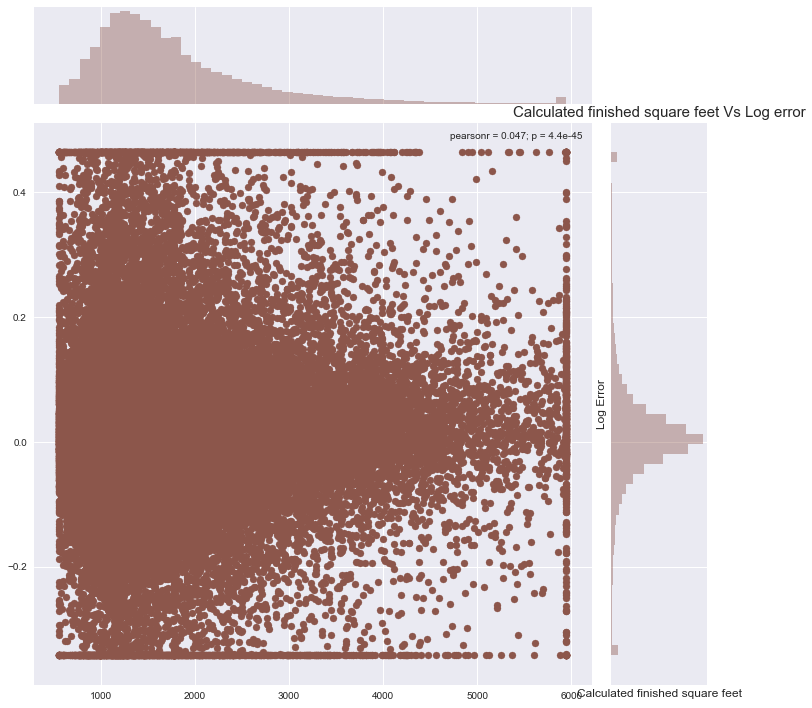

In [104]:
col = "calculatedfinishedsquarefeet"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col]>ulimit] = ulimit
train_df[col].loc[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.calculatedfinishedsquarefeet.values, y=train_df.logerror.values, size=10, color=color[5])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated finished square feet', fontsize=12)
plt.title("Calculated finished square feet Vs Log error", fontsize=15)
plt.show()

/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 864x864 with 0 Axes>

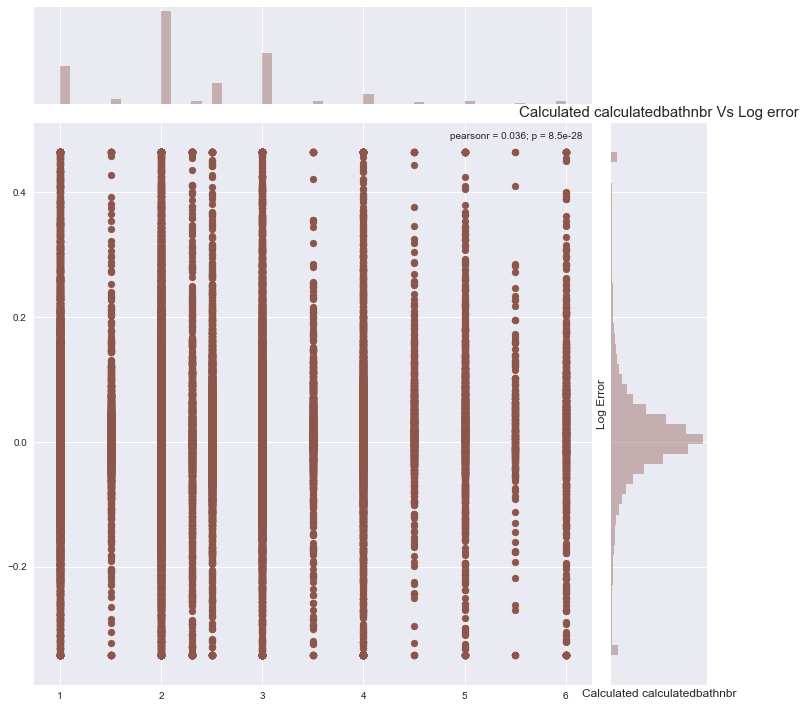

In [105]:
col = "calculatedbathnbr"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col]>ulimit] = ulimit
train_df[col].loc[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.calculatedbathnbr.values, y=train_df.logerror.values, size=10, color=color[5])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated calculatedbathnbr', fontsize=12)
plt.title("Calculated calculatedbathnbr Vs Log error", fontsize=15)
plt.show()

/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 864x864 with 0 Axes>

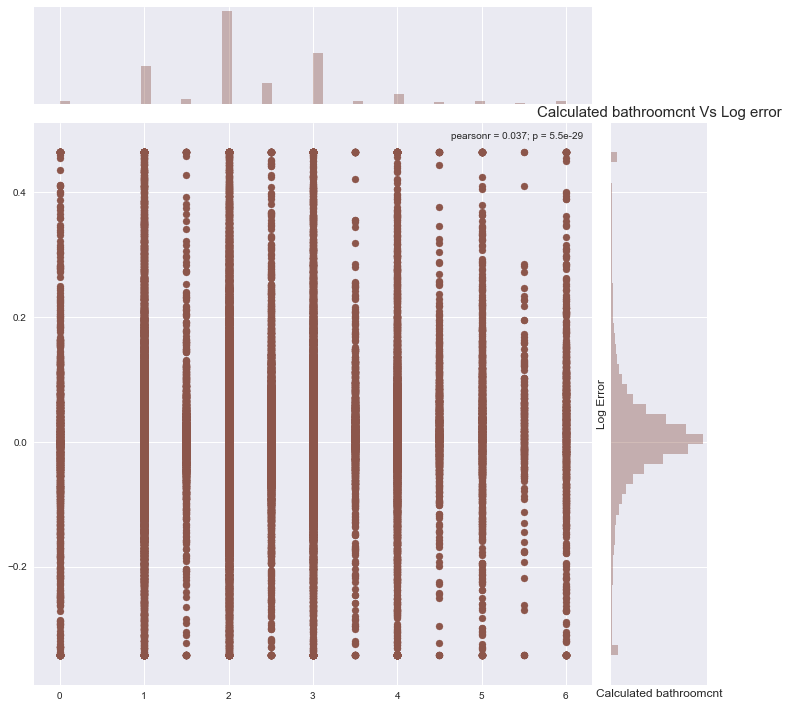

In [106]:
col = "bathroomcnt"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col]>ulimit] = ulimit
train_df[col].loc[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.bathroomcnt.values, y=train_df.logerror.values, size=10, color=color[5])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated bathroomcnt', fontsize=12)
plt.title("Calculated bathroomcnt Vs Log error", fontsize=15)
plt.show()

In [107]:
# sns.countplot :
#     Show the counts of observations in each categorical bin using bars.

#     A count plot can be thought of as a histogram across a categorical, instead of 
#     quantitative, variable.

In [108]:
# thes are means values

train_df_new.bathroomcnt.unique()

array([ 2. ,  3.5,  3. ,  2.5,  4. ,  1. ,  5. ,  5.5,  1.5,  8. ,  0. ,
        4.5,  9. ,  7. ,  6. , 10. ,  6.5,  7.5, 12. , 11. , 20. ,  8.5,
       15. ])

In [109]:
train_df_new.bathroomcnt.value_counts()

2.0     36534
3.0     19946
1.0     15035
2.5      8091
4.0      3743
1.5      1641
0.0      1164
5.0      1142
3.5      1091
4.5       795
6.0       448
5.5       253
7.0       155
8.0       114
6.5        54
9.0        36
10.0       14
7.5         9
11.0        3
12.0        3
8.5         1
20.0        1
15.0        1
Name: bathroomcnt, dtype: int64

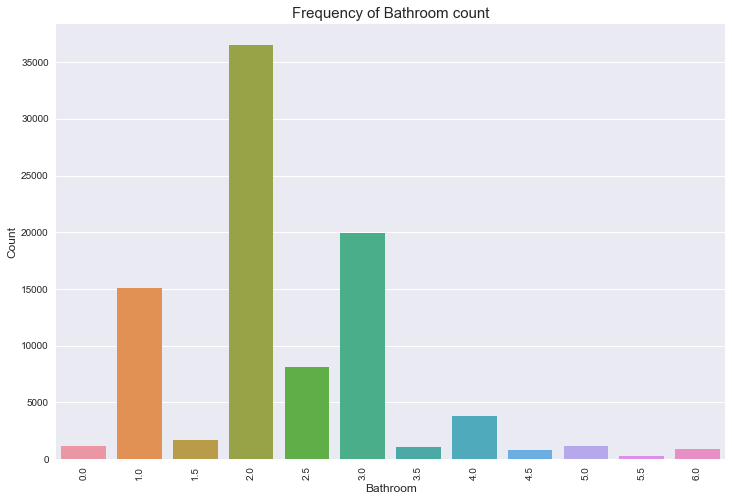

In [110]:
plt.figure(figsize=(12,8))
sns.countplot(x="bathroomcnt", data=train_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bathroom', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bathroom count", fontsize=15)
plt.show()

In [111]:
# BoxPlot:
#     maximum == third quantile == median == first quantile == minimum

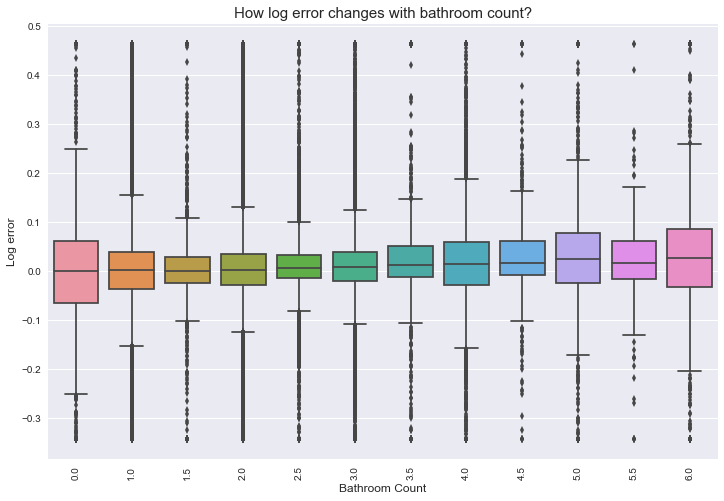

In [112]:
plt.figure(figsize=(12,8))
sns.boxplot(x="bathroomcnt", y="logerror", data=train_df)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('Bathroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("How log error changes with bathroom count?", fontsize=15)
plt.show()

In [113]:
train_df_new.bedroomcnt.unique()

array([ 3.,  4.,  2.,  5.,  1.,  6.,  7.,  0., 12., 11.,  8.,  9., 10.,
       16., 14., 13., 15.])

In [114]:
train_df_new.bedroomcnt.value_counts()

3.0     35447
2.0     22357
4.0     20279
5.0      5077
1.0      3897
0.0      1420
6.0      1120
8.0       274
7.0       234
9.0        91
10.0       35
12.0       22
11.0       12
16.0        4
14.0        3
13.0        1
15.0        1
Name: bedroomcnt, dtype: int64

In [115]:
train_df.bedroomcnt.unique()

array([3., 4., 2., 5., 1., 6., 7., 0.])

In [116]:
train_df.bedroomcnt.value_counts()

3.0    35447
2.0    22357
4.0    20279
5.0     5077
1.0     3897
0.0     1420
6.0     1120
7.0      677
Name: bedroomcnt, dtype: int64

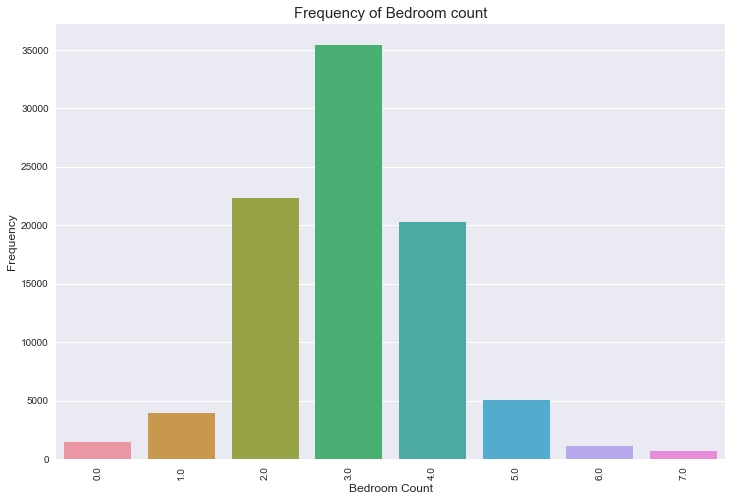

In [117]:
plt.figure(figsize=(12,8))
sns.countplot(x="bedroomcnt", data=train_df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bedroom count", fontsize=15)
plt.show()

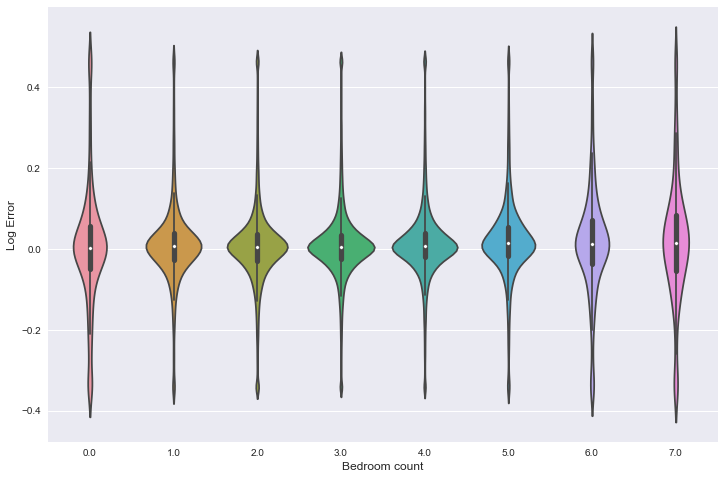

In [118]:
train_df['bedroomcnt'].loc[train_df['bedroomcnt']>7] = 7
plt.figure(figsize=(12,8))
sns.violinplot(x='bedroomcnt', y='logerror', data=train_df)
plt.xlabel('Bedroom count', fontsize=12)
plt.ylabel('Log Error', fontsize=12)
plt.show()

/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ankish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 864x864 with 0 Axes>

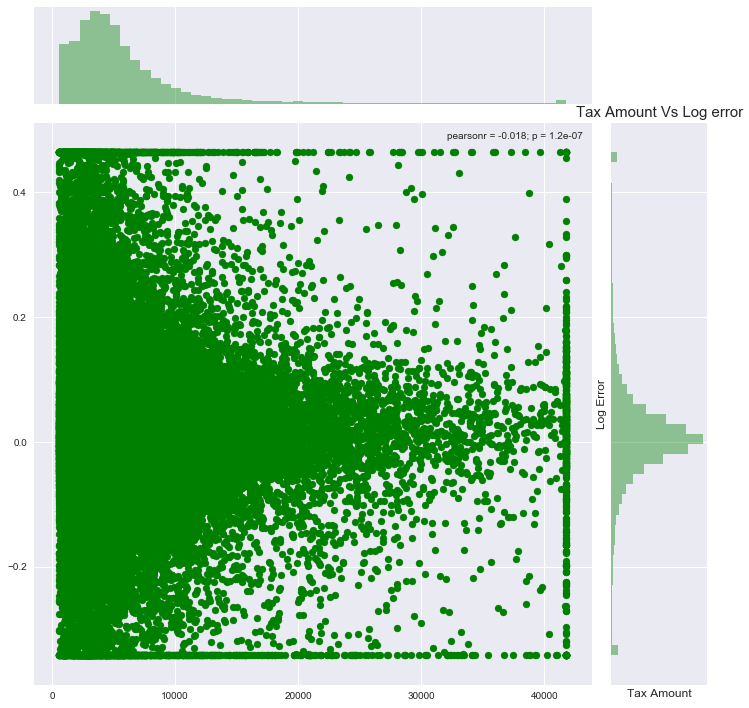

In [119]:
col = "taxamount"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col]>ulimit] = ulimit
train_df[col].loc[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df['taxamount'].values, y=train_df['logerror'].values, size=10, color='g')
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Tax Amount', fontsize=12)
plt.title("Tax Amount Vs Log error", fontsize=15)
plt.show()

In [120]:
from ggplot import *
ggplot(aes(x='yearbuilt', y='logerror'), data=train_df) + \
    geom_point(color='steelblue', size=1) + \
    stat_smooth()



ModuleNotFoundError: No module named 'ggplot'

In [121]:
corr_df

,col_labels,corr_values
49,taxamount,-0.014786
21,heatingorsystemtypeid,-0.013761
33,regionidcounty,-0.009803
6,buildingqualitytypeid,-0.006696
41,yardbuildingsqft17,-0.006642
40,unitcnt,-0.005691
48,landtaxvaluedollarcnt,-0.004178
34,regionidneighborhood,-0.003442
35,regionidzip,-0.002494
30,propertylandusetypeid,-0.002484


In [122]:
train_y = train_df['logerror'].values
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
train_df = train_df.drop(['parcelid', 'logerror', 'transactiondate', 'transaction_month']+cat_cols, axis=1)
feat_names = train_df.columns.values


In [123]:
feat_names

array(['airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13',
       'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt',
       'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'structuretaxvaluedollarcnt',
  

In [126]:
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=25, 
                                     max_depth=30, 
                                     max_features=0.3, 
                                     n_jobs=-1, 
                                     random_state=0)

model.fit(train_df, train_y)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=30,
          max_features=0.3, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

In [127]:
train_df.shape

(90274, 52)

In [129]:
model.feature_importances_.shape

(52,)

In [130]:
for tree in model.estimators_:
    print(tree)

ExtraTreeRegressor(criterion='mse', max_depth=30, max_features=0.3,
          max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=209652396,
          splitter='random')
ExtraTreeRegressor(criterion='mse', max_depth=30, max_features=0.3,
          max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=398764591,
          splitter='random')
ExtraTreeRegressor(criterion='mse', max_depth=30, max_features=0.3,
          max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=924231285,
          splitter='random')
ExtraTreeRegressor(criterion='mse', max_depth=30, max_features=0.3,
          max_leaf_nodes=None, min_impurity_dec

In [131]:
for tree in model.estimators_:
    print(tree.feature_importances_)

[0.01416105 0.00017086 0.0010849  0.00572816 0.03898276 0.
 0.01730934 0.00792074 0.         0.00444004 0.05348288 0.0436862
 0.00043755 0.01035512 0.0044405  0.00414394 0.00156154 0.00566215
 0.00590461 0.0087637  0.011166   0.0151135  0.04970786 0.05720464
 0.05755024 0.         0.00136763 0.         0.         0.
 0.01627724 0.04010385 0.03775812 0.0014524  0.03134558 0.04117848
 0.01087579 0.         0.00222293 0.00042389 0.00681976 0.0046217
 0.00052376 0.05585567 0.00931458 0.06145272 0.0627105  0.
 0.06651325 0.07829706 0.02150876 0.03039806]
[0.01199602 0.00017511 0.00072181 0.00984629 0.03731423 0.
 0.02132038 0.0096609  0.         0.00273245 0.05115803 0.04527931
 0.00076    0.00924679 0.00465801 0.00300165 0.00255372 0.00562169
 0.00806342 0.00803874 0.011428   0.01303621 0.05017464 0.04836831
 0.05885753 0.         0.00207767 0.         0.         0.
 0.01587502 0.03913107 0.0321331  0.00192309 0.03676914 0.04251949
 0.01008908 0.         0.00334722 0.00063363 0.00650284 0.

In [132]:
for tree in model.estimators_:
    print(np.std(tree.feature_importances_))

0.022533183434090935
0.02223747191131254
0.021609783691223888
0.02185307216800792
0.023396371337745275
0.021624869834770594
0.021278794570474404
0.02201226072605149
0.021926416002906998
0.02179420019089937
0.021191718376662783
0.02179681304366155
0.02167908976630617
0.020716595497070455
0.022006284938340278
0.022042406214780156
0.02187234095138808
0.02140976631994493
0.021561925195810655
0.021035001381374114
0.022272856995001086
0.02125787576973586
0.021866991665959755
0.021149104486380594
0.022357657243782688


In [133]:
## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
print(std)

[0.00143582 0.0001919  0.00022415 0.00399946 0.00419161 0.
 0.00199466 0.00376444 0.         0.00078955 0.00272408 0.00233407
 0.00018901 0.00160939 0.00072192 0.00069587 0.00058415 0.00140205
 0.00342266 0.00109419 0.00152556 0.00145179 0.00289837 0.00283686
 0.00344857 0.         0.00035745 0.         0.         0.
 0.00158767 0.0027276  0.00227463 0.00081497 0.0029631  0.00322798
 0.00094788 0.         0.00104109 0.00021995 0.00147955 0.00071529
 0.00029792 0.00281139 0.00123751 0.00234865 0.00250596 0.
 0.00262117 0.00388723 0.00203474 0.00230854]


In [134]:
print(std.shape)

(52,)


In [138]:
# ([(tree.feature_importances_).shape for tree in model.estimators_])


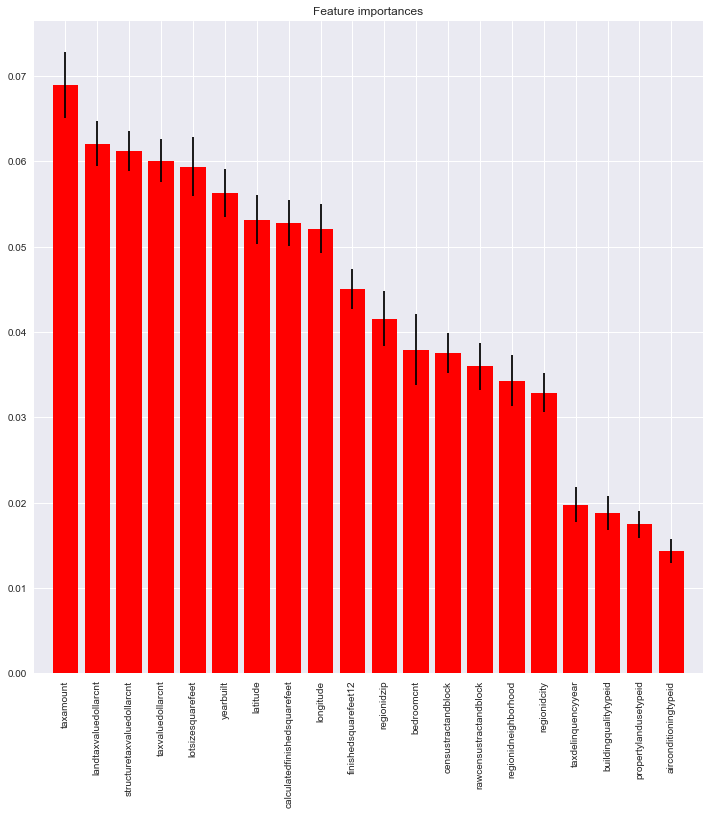

In [124]:

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [140]:
std, std.shape

(array([0.00143582, 0.0001919 , 0.00022415, 0.00399946, 0.00419161,
        0.        , 0.00199466, 0.00376444, 0.        , 0.00078955,
        0.00272408, 0.00233407, 0.00018901, 0.00160939, 0.00072192,
        0.00069587, 0.00058415, 0.00140205, 0.00342266, 0.00109419,
        0.00152556, 0.00145179, 0.00289837, 0.00283686, 0.00344857,
        0.        , 0.00035745, 0.        , 0.        , 0.        ,
        0.00158767, 0.0027276 , 0.00227463, 0.00081497, 0.0029631 ,
        0.00322798, 0.00094788, 0.        , 0.00104109, 0.00021995,
        0.00147955, 0.00071529, 0.00029792, 0.00281139, 0.00123751,
        0.00234865, 0.00250596, 0.        , 0.00262117, 0.00388723,
        0.00203474, 0.00230854]), (52,))

In [125]:
import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(train_df, train_y, feature_names=train_df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()


ModuleNotFoundError: No module named 'xgboost'

In [150]:
train_df.columns.values

array(['airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13',
       'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt',
       'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'structuretaxvaluedollarcnt',
  

In [149]:
train_df.columns

Index(['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'structuretaxvaluedollarcnt', 'taxvalue

In [151]:
import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}


In [153]:
# xgb.DMatrix(train_df, train_y, feature_names=train_df.columns.values)


In [155]:
# xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=5)

NameError: name 'dtrain' is not defined

In [160]:
dtrain = xgb.DMatrix(train_df, train_y, feature_names=train_df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)


[15:32:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=8
[15:32:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=8
[15:32:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=8
[15:32:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=8
[15:32:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=8
[15:32:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 220 extra nodes, 0 pruned nodes, max_depth=8
[15:32:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=8
[15:32:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=8
[15:32:17

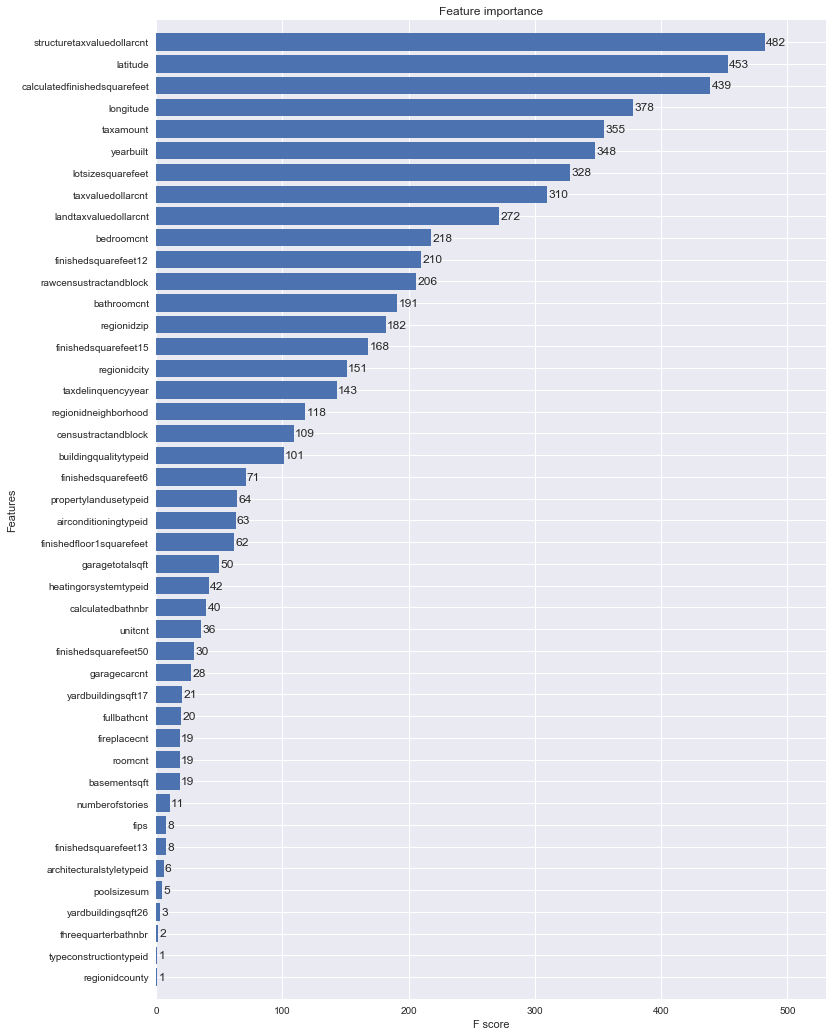

In [164]:
# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()


In [167]:
train_df.head().transpose()

,0,1,2,3,4
airconditioningtypeid,1.000000e+00,1.816372e+00,1.000000e+00,1.000000e+00,1.816372e+00
architecturalstyletypeid,7.229885e+00,7.229885e+00,7.229885e+00,7.229885e+00,7.229885e+00
basementsqft,7.135814e+02,7.135814e+02,7.135814e+02,7.135814e+02,7.135814e+02
bathroomcnt,2.000000e+00,3.500000e+00,3.000000e+00,2.000000e+00,2.500000e+00
bedroomcnt,3.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
buildingclasstypeid,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
buildingqualitytypeid,4.000000e+00,5.565407e+00,4.000000e+00,4.000000e+00,5.565407e+00
calculatedbathnbr,2.000000e+00,3.500000e+00,3.000000e+00,2.000000e+00,2.500000e+00
decktypeid,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01
finishedfloor1squarefeet,1.347974e+03,1.347974e+03,1.347974e+03,1.347974e+03,1.347974e+03


In [170]:
train_df.bathroomcnt.unique()

array([2. , 3.5, 3. , 2.5, 4. , 1. , 5. , 5.5, 1.5, 6. , 0. , 4.5])